## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
# Top 5 rows from dataset
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## EDA and Feature Engineering

In [4]:
# Dimensions of dataset
data.shape

(1000, 40)

There are 1000 rows and 40 columns are presents in dataset including target variable (Label).

In [5]:
# Checking columns
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

'fraud_reported' column is our target variable and remaining all are independent variables.

In [6]:
# Datatypes in data
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Most of the columns are object type datatypes.

In [7]:
# Checking the missing values
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Coulmn "_c39" is completely empty. Hence we will remove this column. We can see in other columns there are no null values present, But I saw on the dataset there are few columns with special characters.

In [8]:
data.drop('_c39', axis=1, inplace=True)

dropped the column.

In [9]:
# Checking special character '?' in dataset
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

There are three columns namely 'collision_type', 'property_damage', and 'police_report_available' has consists of special character '?'. Lets check their value counts.

In [10]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In column 'collision_type', there are 178 '?' are present. Lets check mode of this column.

In [11]:
data['collision_type'].mode()

0    Rear Collision
dtype: object

In [12]:
data['collision_type'] = data['collision_type'].replace('?', 'Rear Collision')

Replaced the special character value with mode of the column.

In [13]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

'property_damage', there are 360 '?' are present. Lets check mode of this column.

In [14]:
data['property_damage'].mode()

0    ?
dtype: object

In [15]:
data['property_damage'] = data['property_damage'].replace('?', 'NO')

Replaced the special character value with string 'NO'.

In [16]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In column, 'police_report_available', there are 343 '?' are present. Lets check mode of this column.

In [17]:
data['police_report_available'].mode()

0     ?
1    NO
dtype: object

In [18]:
data['police_report_available'] = data['police_report_available'].replace('?', 'NO')

Replaced the special character value with string 'NO'.

In [19]:
# Check missing values
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

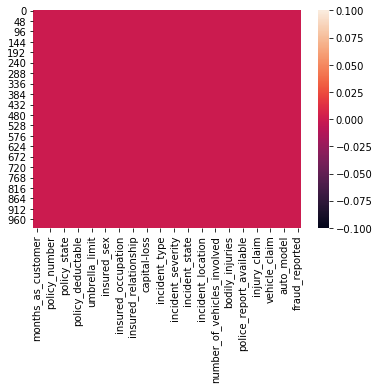

In [20]:
sns.heatmap(data.isnull())

Now, dataset is free from NULL values. Its cleaned.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [22]:
# Statistical information
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Observations:
    
The difference between 75th percentile and max is not much, So there is presence of less Outliers.

Mean and Median is almost same for every column, so the data almost normal distributed.

In [23]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])

In [24]:
data['policy_bind_month'] = data['policy_bind_date'].dt.month

In [25]:
data['policy_bind_year'] = data['policy_bind_date'].dt.year

We have converted the 'policy_bind_date' into datetime format then made 2 new columns out of the 'policy_bind_month' and 'policy_bind_year'

In [26]:
data.drop('policy_bind_date', axis=1, inplace=True)

Drpped the column 'policy_bind_date'

In [27]:
a = data.describe(include=['O']).columns

Saved all the object datatypyes in a variable.

In [28]:
for i in a:
    print(i)
    print(data[i].value_counts())
    print('\n')

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


insured_hobbies
reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
movies            55
golf           

We have to drop the column 'incident_location' as it has all different kind of data in all rows.

In [29]:
data['incident_location'].nunique()

1000

In [30]:
data.drop('incident_location', axis=1, inplace=True)

In [31]:
a = data.select_dtypes('object').columns.tolist()

In [32]:
data['incident_date'] = pd.to_datetime(data['incident_date'])
data['incident_date_month'] = data['incident_date'].dt.month

Changing the 'incident_date' column into datetime format and extracting the month from it and making a new column 'incident_date_month', and now we will drop the column 'incident_date'.

In [33]:
data.drop('incident_date', axis=1, inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

New columns added.

In [35]:
a = data.describe(include=['O']).columns

Saving again the object datatype columns in a variable.

## Univariate Analysis

In [36]:
# Categorical columns
df_cols = [col for col in data.columns if data[col].dtype=="O"]
df_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

Text(0.5, 1.0, 'policy_state')

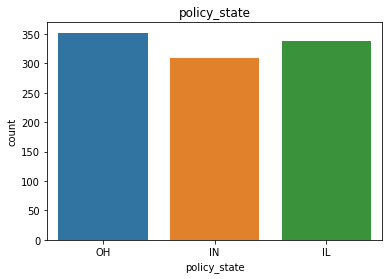

In [37]:
sns.countplot(data['policy_state'])
plt.title("policy_state")

In policy state CH is high and IN is less.

Text(0.5, 1.0, 'policy_csl')

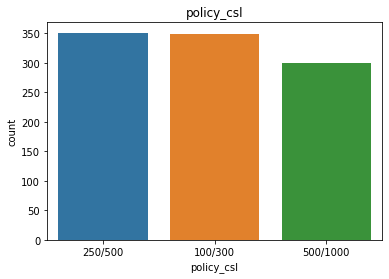

In [38]:
sns.countplot(data['policy_csl'])
plt.title("policy_csl")

In policy csl 250/500, 100/300 have equal values.

Text(0.5, 1.0, 'insured_sex')

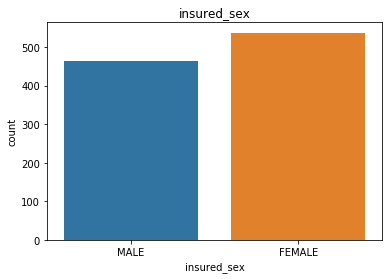

In [39]:
sns.countplot(data['insured_sex'])
plt.title("insured_sex")

Female members are highly insured than Male members.

Text(0.5, 1.0, 'insured_education_level')

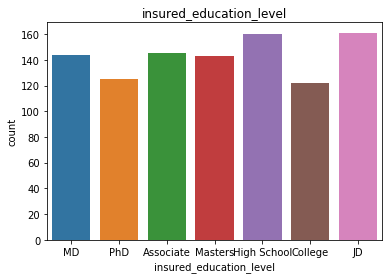

In [40]:
sns.countplot(data['insured_education_level'])
plt.title("insured_education_level")

The education level with High school and JD are highly insured while PhD and College are less insured.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

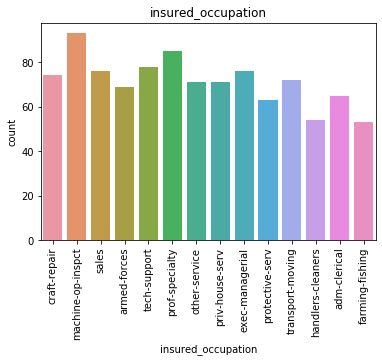

In [41]:
sns.countplot(data['insured_occupation'])
plt.title("insured_occupation")
plt.xticks(rotation=90)

Occupation with Machine-op-inspect got highly insured and handler-cleaners and farming-fishing are less insured.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

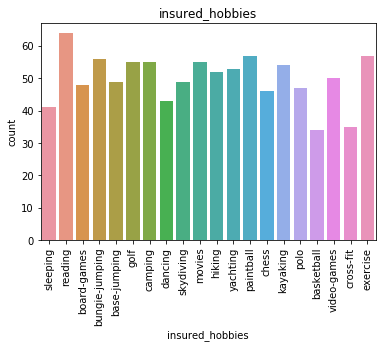

In [42]:
sns.countplot(data['insured_hobbies'])
plt.title("insured_hobbies")
plt.xticks(rotation=90)

Hobbies with reading are highly insured and basketball and cross-fit are less insured.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

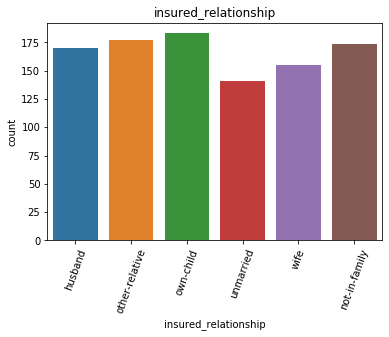

In [43]:
sns.countplot(data['insured_relationship'])
plt.title("insured_relationship")
plt.xticks(rotation=70)

Members with own-child is highly insured and unmarried is less insured.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

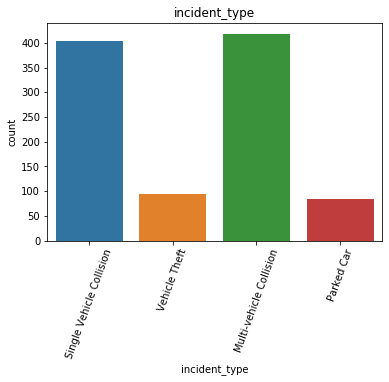

In [44]:
sns.countplot(data['incident_type'])
plt.title("incident_type")
plt.xticks(rotation=70)

Multi-vehicle Collision and Single-vehicle Collision are most cases while Vehicle Theft and Parked Car are less cases.

Text(0.5, 1.0, 'collision_type')

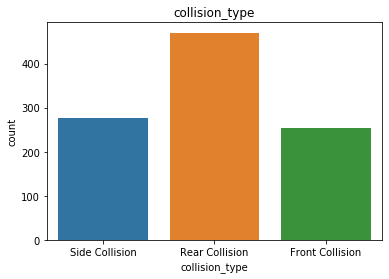

In [45]:
sns.countplot(data['collision_type'])
plt.title("collision_type")

Rear Collision cases are high and front collision cases are less.

Text(0.5, 1.0, 'incident_severitye')

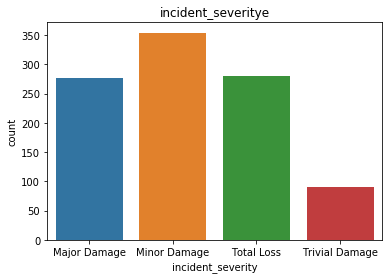

In [46]:
sns.countplot(data['incident_severity'])
plt.title("incident_severitye")

Minor Damage cases are high and Trivial Damage cases are less.

Text(0.5, 1.0, 'authorities_contacted')

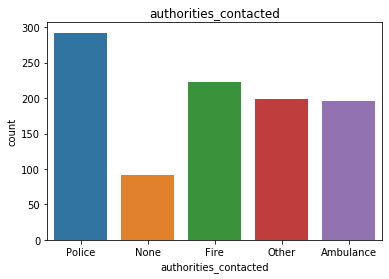

In [47]:
sns.countplot(data['authorities_contacted'])
plt.title("authorities_contacted")

After collision the authorities contacted for police is high.

Text(0.5, 1.0, 'incident_state')

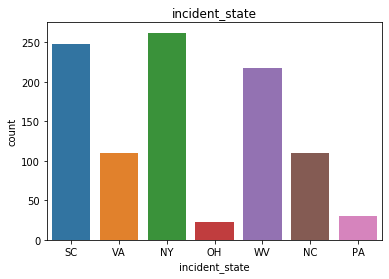

In [48]:
sns.countplot(data['incident_state'])
plt.title("incident_state")

In NY and SC states, the collision incidents are high and OH state, collision incidents are less.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

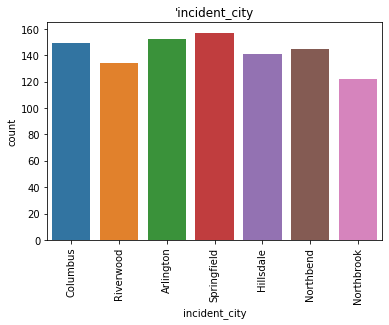

In [49]:
sns.countplot(data['incident_city'])
plt.title("'incident_city")
plt.xticks(rotation=90)

Almost all cities have equal collision cases with slightly changes.

Text(0.5, 1.0, 'property_damage')

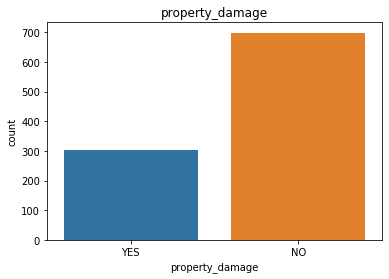

In [50]:
sns.countplot(data['property_damage'])
plt.title("property_damage")

In most of the cases property damage is less.

Text(0.5, 1.0, 'police_report_available')

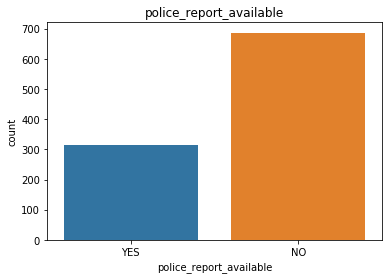

In [51]:
sns.countplot(data['police_report_available'])
plt.title("police_report_available")

In Maximum cases the police report is not available.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

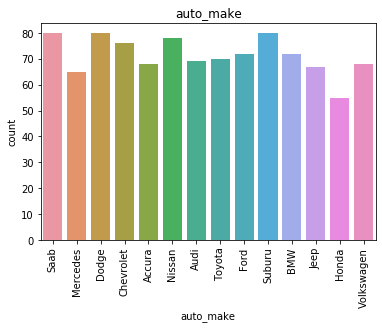

In [52]:
sns.countplot(data['auto_make'])
plt.title("auto_make")
plt.xticks(rotation=90)

Saab, Dodge, Nissan and Suburu have high collision report and Honda have less collision report.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

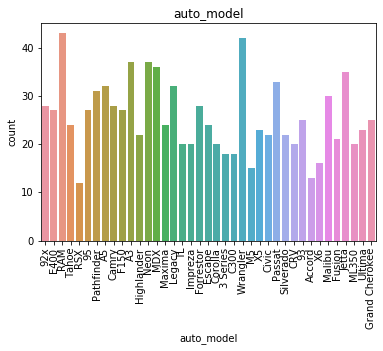

In [53]:
sns.countplot(data['auto_model'])
plt.title("auto_model")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'fraud_reported')

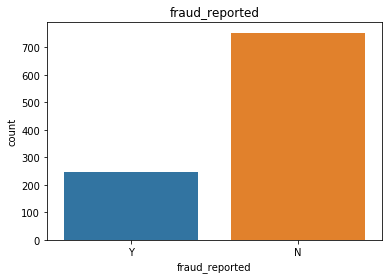

In [54]:
sns.countplot(data['fraud_reported'])
plt.title("fraud_reported")

The Fraud cases are less compared to insurance claimed cases.

'fraud_reported' column is our target variable (Label).

In [55]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

## Bivariate Analysis

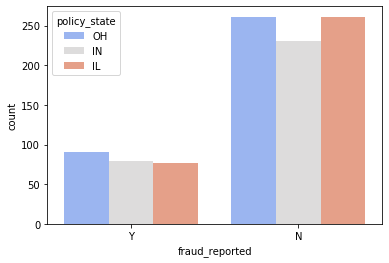

In [56]:
sns.countplot(data['fraud_reported'], hue='policy_state', palette='coolwarm', data=data)

OH cases are high

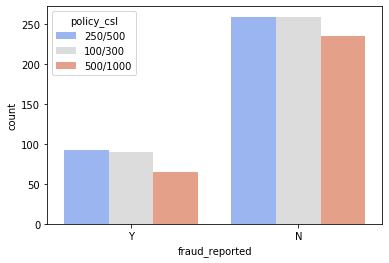

In [57]:
sns.countplot(data['fraud_reported'], hue='policy_csl', palette='coolwarm', data=data)

policy_csl 250/500 and 100/300 have high.

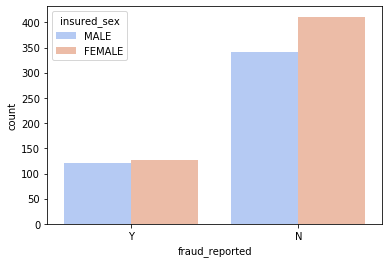

In [58]:
sns.countplot(data['fraud_reported'], hue='insured_sex', palette='coolwarm', data=data)

Almost male and female Fraud cases are equal.

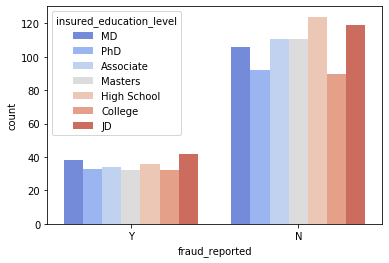

In [59]:
sns.countplot(data['fraud_reported'], hue='insured_education_level', palette='coolwarm', data=data)

JD and MD have high Fraud cases.

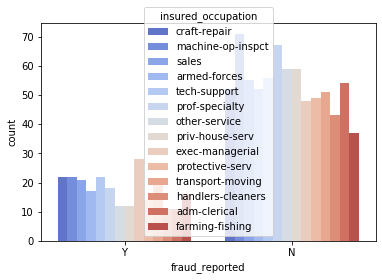

In [60]:
sns.countplot(data['fraud_reported'], hue='insured_occupation', palette='coolwarm', data=data)

exec-managerial have high Fraud cases.

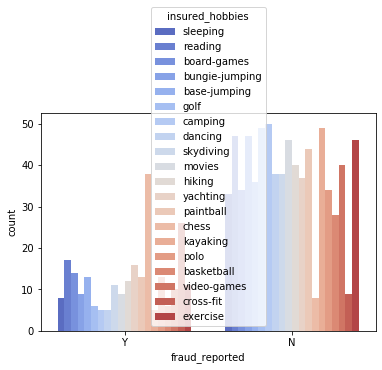

In [61]:
sns.countplot(data['fraud_reported'], hue='insured_hobbies', palette='coolwarm', data=data)

They who have hobby is chess are done Fraud.

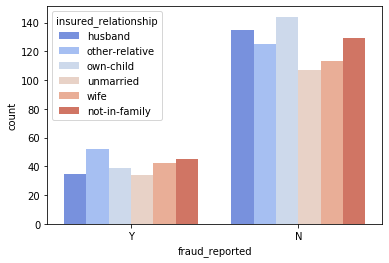

In [62]:
sns.countplot(data['fraud_reported'], hue='insured_relationship', palette='coolwarm', data=data)

Customers with other-relatives have high Fraud cases.

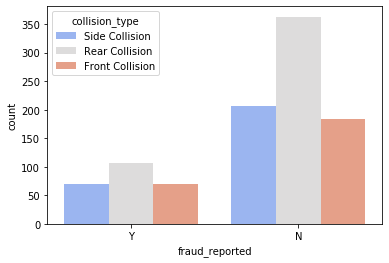

In [63]:
sns.countplot(data['fraud_reported'], hue='collision_type', palette='coolwarm', data=data)

Rear collision have high Fraud cases.

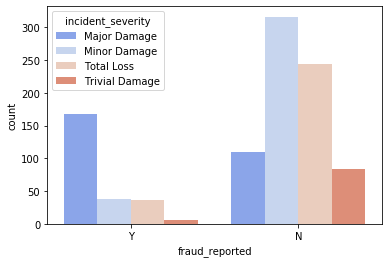

In [64]:
sns.countplot(data['fraud_reported'], hue='incident_severity', palette='coolwarm', data=data)

Severity with Major Damage high Fraud cases.

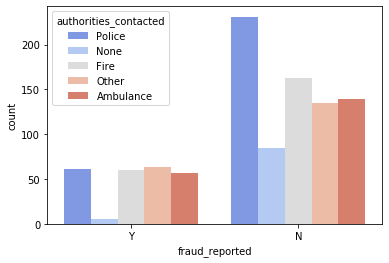

In [65]:
sns.countplot(data['fraud_reported'], hue='authorities_contacted', palette='coolwarm', data=data)

Almost all authorities contacted have high Fraud cases.

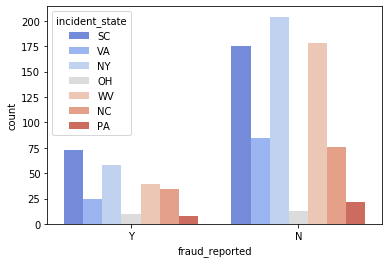

In [66]:
sns.countplot(data['fraud_reported'], hue='incident_state', palette='coolwarm', data=data)

Sc state have high Fraud cases.

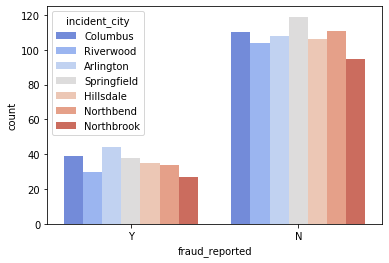

In [67]:
sns.countplot(data['fraud_reported'], hue='incident_city', palette='coolwarm', data=data)

Arlington city have high Fraud cases.

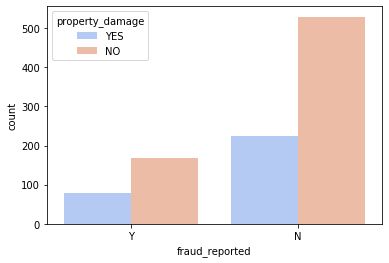

In [68]:
sns.countplot(data['fraud_reported'], hue='property_damage', palette='coolwarm', data=data)

Property Damage have less Fraud cases.

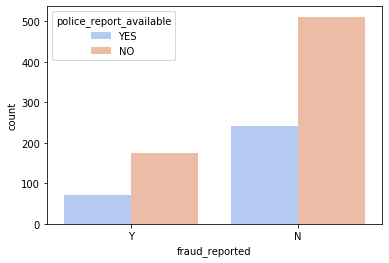

In [69]:
sns.countplot(data['fraud_reported'], hue='police_report_available', palette='coolwarm', data=data)

police report available in less, have high Fraud cases.

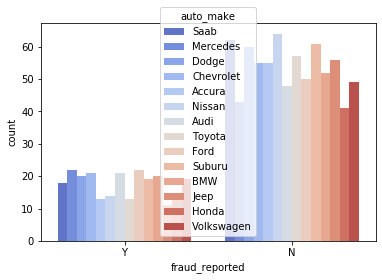

In [70]:
sns.countplot(data['fraud_reported'], hue='auto_make', palette='coolwarm', data=data)

Mercedes and Ford, Fraud cases are high.

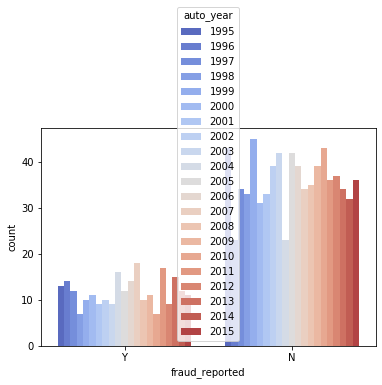

In [71]:
sns.countplot(data['fraud_reported'], hue='auto_year', palette='coolwarm', data=data)

In 2007 the Fraud cases are high.

## Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in a:
    data[i] = LE.fit_transform(data[i])
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_date_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,6510,13020,52080,10,1,2004,1,10,2014,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,780,780,3510,8,12,2007,1,6,2006,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,7700,3850,23100,4,30,2007,0,6,2000,2
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,6340,6340,50720,3,34,2014,1,5,1990,10
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1300,650,4550,0,31,2009,0,6,2014,2


## Multivariate Analysis

In [73]:
# Correlation
corr = data.corr()
corr

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_date_month
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.005750,-0.048276,0.024659
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.015501,-0.037444,0.023404
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,0.005509,-0.040099,-0.042512
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.071450,-0.007276,0.023643
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.045345,-0.016466,-0.011794
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.050416,-0.049598,-0.006418
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.035355,0.001249,0.021559
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.009961,0.048008,0.042409
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,0.015864,-0.001100,0.005461
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.004033,-0.032891,0.024227


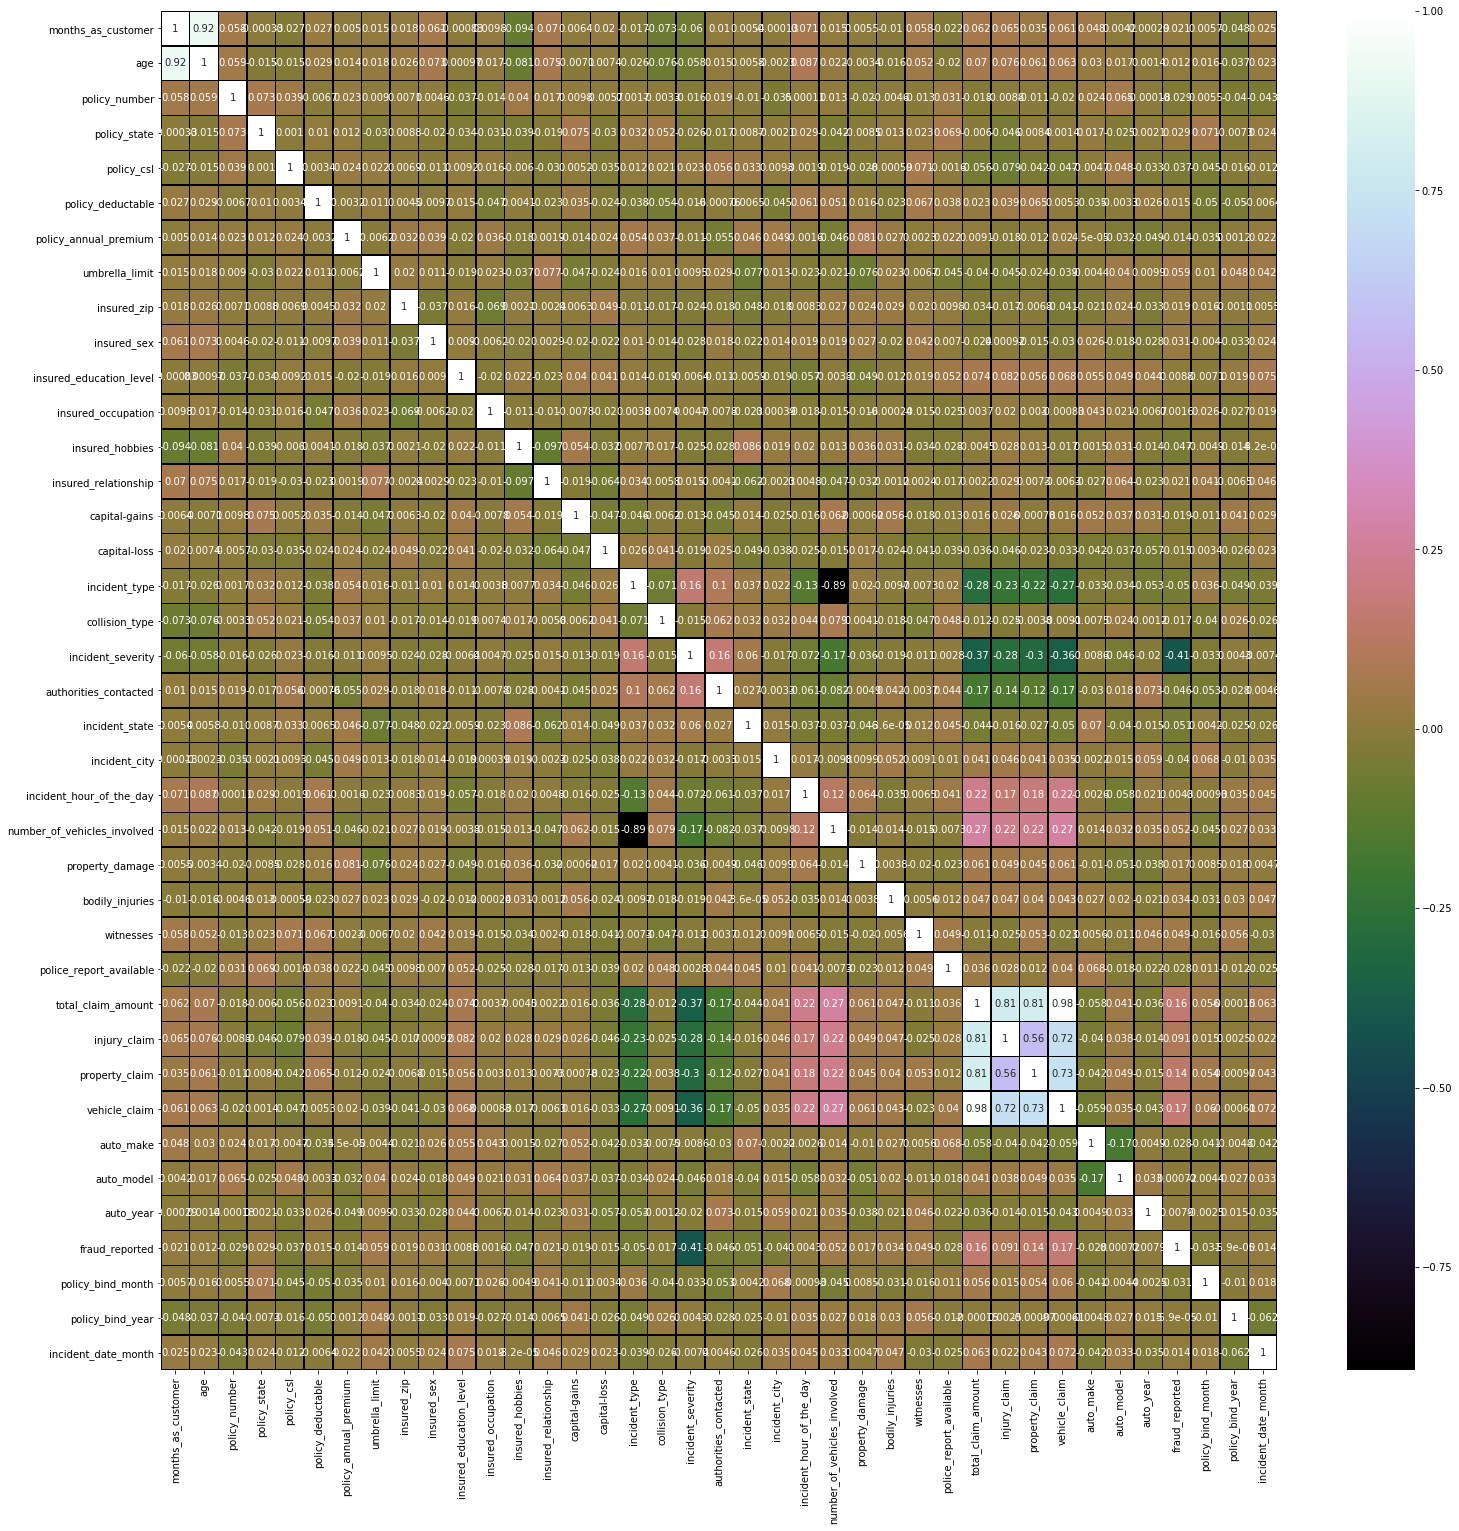

In [74]:
# Heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, cmap='cubehelix', linewidth=0.5, linecolor='black', annot=True)
plt.show()

Observations:

Max. correlation is with vehicle claim and least with incident_severity.

total_claim_amount vehicle claim amount is highly correlated.

## Checking Outliers

months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_number                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_state                   AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_csl                        AxesSubplot(0.125,0.739237;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
policy_annual_premium          AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
umbrella_limit                 AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
insured_zip                       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
insured_sex                    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
insured_education_level        AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
insured_occupation             AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
insured_hobbies             

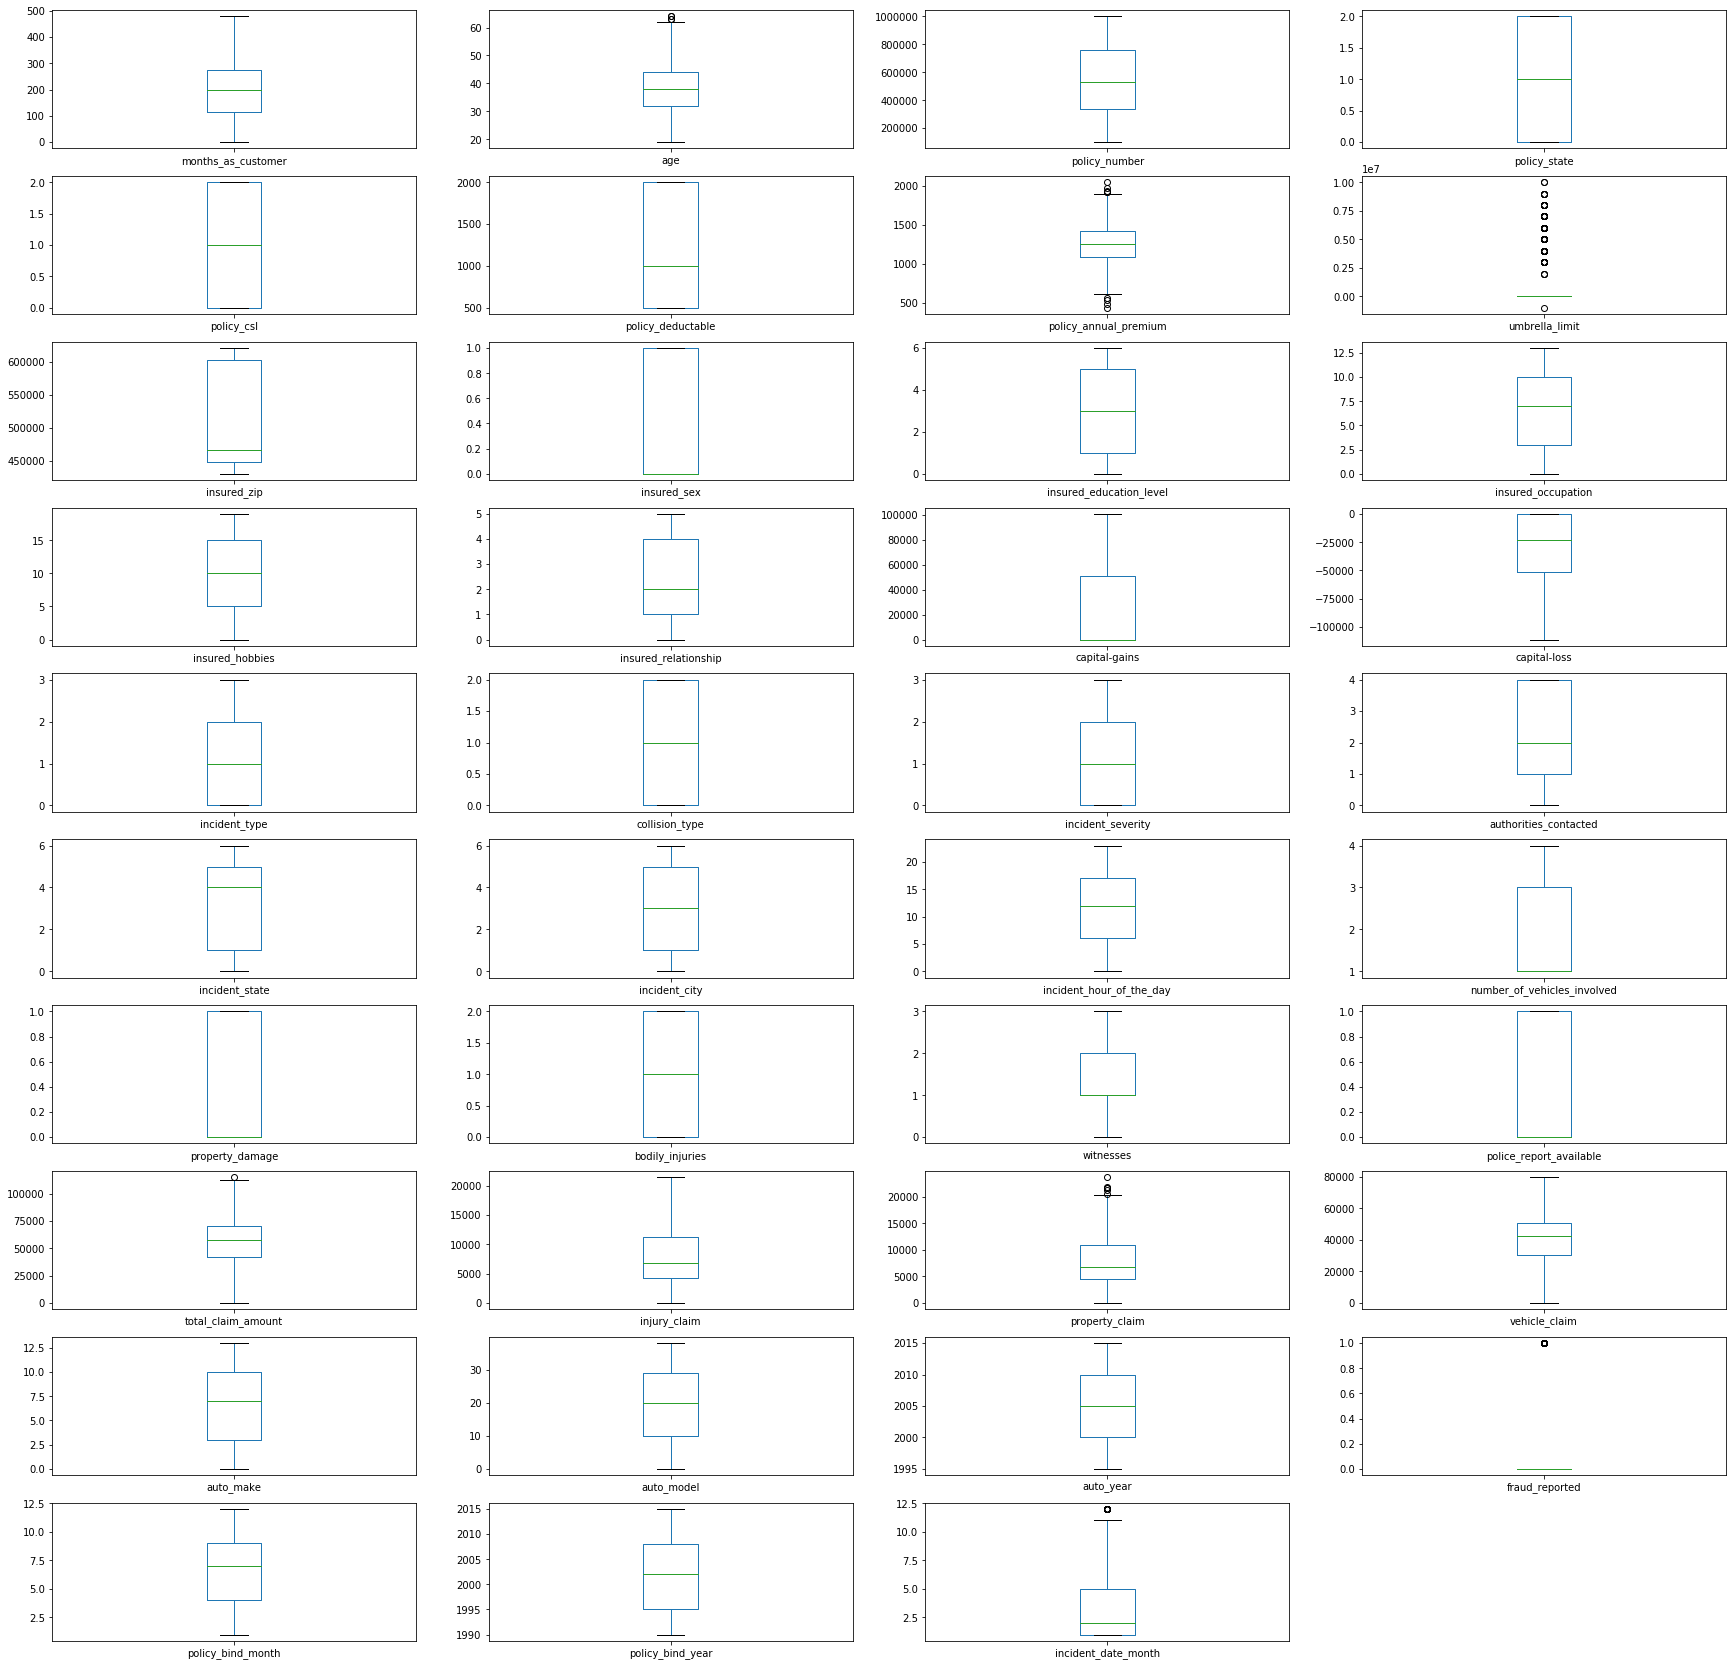

In [76]:
data.plot(kind='box', subplots=True, layout=(10, 4), figsize=(30, 30))


There are certain outliers presents in data.

## Removing Outliers

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(data))

In [78]:
threshold=3
df=data[(z<3).all(axis=1)]

In [79]:
data.shape

(1000, 39)

In [80]:
df.shape

(980, 39)

In [81]:
# Data loss
Data_loss = ((1000-980)/1000)*100
Data_loss

2.0

Data loss is 2%, Outliers are removed.

## Splitting the dataset into x and y variables.

In [82]:
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']
print(x.shape)
print(y.shape)

(980, 38)
(980,)


## Checking skewness

In [83]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093


In [84]:
x['total_claim_amount']=np.sqrt(x['total_claim_amount'])

removed the skewness from all the columns.

## Scaling the data

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.069568,0.983352,-0.095774,1.179821,0.067231,-0.224643,0.620031,-0.467878,-0.484014,1.071971,...,0.681515,-0.187627,1.176015,0.753824,0.851959,-1.640447,-0.188594,1.013473,1.683157,-0.733396
1,0.202726,0.329711,-0.790245,-0.024580,0.067231,1.412161,-0.248448,1.890767,-0.455363,1.071971,...,-1.985818,-1.361005,-1.378984,-1.824679,0.355279,-0.651740,0.310476,-0.162612,0.600279,-0.733396
2,-0.612105,-1.086511,0.549720,1.179821,-1.175916,1.412161,0.645834,1.890767,-0.981629,-0.932861,...,-0.424760,0.056059,-0.738147,-0.784678,-0.638083,0.966145,0.310476,-0.162612,-0.211879,-0.427163
3,0.445442,0.220771,-1.237342,-1.228980,0.067231,1.412161,0.656603,2.362496,1.506233,-0.932861,...,0.466836,-0.222439,-0.218380,0.681623,-0.886423,1.325675,1.474975,-0.456633,-1.565477,2.022697
4,0.202726,0.547591,-0.694703,-1.228980,1.310379,-0.224643,1.353117,2.362496,1.542524,1.071971,...,-1.857900,-1.254521,-1.406121,-1.769467,-1.631444,1.056027,0.643190,-0.162612,1.683157,-0.427163


Scaled the data

## PCA

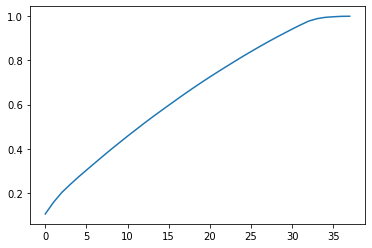

In [86]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

we can see that at 33  component it has 95% of variance we will reduce it to 33.

In [87]:
pca = PCA(n_components=33)
df_new = pca.fit_transform(x)
x = pd.DataFrame(df_new)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.798820,0.956555,-1.165064,-3.009205,-0.175593,0.034301,-0.781697,-0.578797,0.498724,0.124598,...,1.175452,0.051934,-0.196718,-0.615263,-0.653400,-0.642653,-0.506645,-1.250446,0.275642,-0.439563
1,-3.799419,0.716939,-0.247250,0.030657,0.022418,0.226711,0.716222,1.068498,-0.632668,0.145623,...,-0.228184,0.831616,-0.704980,0.443093,0.534973,0.761650,-1.459998,-0.267789,0.487346,0.402421
2,-0.488149,-0.866056,1.579760,2.087103,-0.969373,0.328881,-0.597057,0.423566,0.853562,1.060056,...,1.245072,-0.137080,-0.483330,0.265268,1.005642,-0.499571,0.031969,0.724416,-0.728432,1.746587
3,0.128526,1.225127,-0.841705,3.091319,-1.416841,2.274528,-0.511674,0.476832,1.306481,2.439579,...,0.899586,1.118267,-0.946647,-0.662311,-2.006041,-0.156934,0.689386,-0.560171,-0.688324,1.128946
4,-3.249185,1.279578,0.130867,2.746484,0.585700,-0.899631,-1.285200,0.277231,0.859599,-0.512635,...,-0.585482,2.807264,0.951835,-1.083985,-1.344255,0.551476,0.096566,-0.008680,0.218697,0.477803


reduced columns to 33

## Sampling

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y) 

In [89]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

Now, Balanced the Imbalanced data

In [90]:
print(x.shape)
print(y.shape)

(1480, 33)
(1480,)


## Trainig and testing of model

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# Logistic Regression

In [92]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=LogisticRegression()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.8040540540540541 on random state 86


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=86)

In [94]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of LogisticRegression() is: 
80.4054054054054


confusion_matrix of LogisticRegression() is: 
[[121  37]
 [ 21 117]]


classification_report of LogisticRegression() is: 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       158
           1       0.76      0.85      0.80       138

    accuracy                           0.80       296
   macro avg       0.81      0.81      0.80       296
weighted avg       0.81      0.80      0.80       296





In [95]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of LogisticRegression() is: 0.7351351351351351


# GaussianNB Classifier

In [96]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=GaussianNB()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.8074324324324325 on random state 4


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=4)

In [98]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of GaussianNB() is: 
80.74324324324324


confusion_matrix of GaussianNB() is: 
[[115  25]
 [ 32 124]]


classification_report of GaussianNB() is: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       140
           1       0.83      0.79      0.81       156

    accuracy                           0.81       296
   macro avg       0.81      0.81      0.81       296
weighted avg       0.81      0.81      0.81       296





In [99]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of GaussianNB() is: 0.7493243243243243


# Support Vector Classifier

In [100]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=SVC()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.9087837837837838 on random state 2


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [102]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of SVC() is: 
90.87837837837837


confusion_matrix of SVC() is: 
[[129  18]
 [  9 140]]


classification_report of SVC() is: 
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       147
           1       0.89      0.94      0.91       149

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296





In [103]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of SVC() is: 0.8506756756756756


# Decision Tree Classifier

In [104]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=DecisionTreeClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.8040540540540541 on random state 189


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=189)

In [106]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of DecisionTreeClassifier() is: 
79.3918918918919


confusion_matrix of DecisionTreeClassifier() is: 
[[111  37]
 [ 24 124]]


classification_report of DecisionTreeClassifier() is: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       148
           1       0.77      0.84      0.80       148

    accuracy                           0.79       296
   macro avg       0.80      0.79      0.79       296
weighted avg       0.80      0.79      0.79       296





In [107]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of DecisionTreeClassifier() is: 0.7358108108108108


# Random Forest Classifier

In [108]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=RandomForestClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.9290540540540541 on random state 119


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=119)

In [110]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of RandomForestClassifier() is: 
92.56756756756756


confusion_matrix of RandomForestClassifier() is: 
[[141   9]
 [ 13 133]]


classification_report of RandomForestClassifier() is: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.94      0.91      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296





In [111]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of RandomForestClassifier() is: 0.8864864864864863


# KNeighborsClassifier

In [112]:
maxAccu=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    a=KNeighborsClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Best Accuracy is', maxAccu, 'on random state', maxRS)

Best Accuracy is 0.7466216216216216 on random state 187


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=187)

In [114]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('Accuracy Score of', a, 'is: ')
print(accuracy_score(y_test,predm)*100)
print('\n')
print('confusion_matrix of', a, 'is: ')
print(confusion_matrix(y_test,predm))
print('\n')
print('classification_report of', a, 'is: ')      
print(classification_report(y_test,predm))
print('\n')

Accuracy Score of KNeighborsClassifier() is: 
74.66216216216216


confusion_matrix of KNeighborsClassifier() is: 
[[ 61  73]
 [  2 160]]


classification_report of KNeighborsClassifier() is: 
              precision    recall  f1-score   support

           0       0.97      0.46      0.62       134
           1       0.69      0.99      0.81       162

    accuracy                           0.75       296
   macro avg       0.83      0.72      0.71       296
weighted avg       0.81      0.75      0.72       296





In [115]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(a, x, y, cv=5).mean()
print("The cross validation score of", a,"is:", cv)

The cross validation score of KNeighborsClassifier() is: 0.668918918918919


From the above algorithms, we can say that the RandomForestClassifier is working well by giving an accuracy of 92.56% and cross validation score of 88.64%. Now we will improve accuracy by Hypereparameter tuning.

## Hyperparameter tuning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
rfc=RandomForestClassifier(random_state=119)   
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)   
print(grid.best_score_) 

{'criterion': 'gini', 'n_estimators': 1000}
0.8614853750983338


In [118]:
# Using the best parameters obtained
RF=RandomForestClassifier(random_state=119,criterion='gini',n_estimators=1000)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  91.55405405405406
Cross validation score:  89.1891891891892


After hyperparameter tunning the accuracy score is decreased.

## AUC-ROC

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = RF.predict_proba(x_test)[:,1]

In [121]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

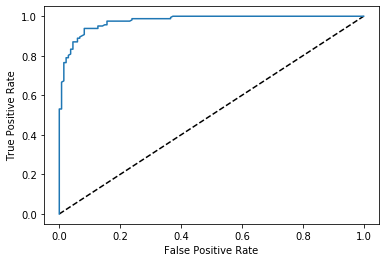

In [122]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

as we see the graph is little far from 1 as our score is less tham 1.

In [123]:
auc_score = roc_auc_score(y_test, pred)
print(auc_score)

0.9157453473373871


auc score is almost similar to the accuracy score as its 91.57%

## Saving the model

In [124]:
import joblib
joblib.dump(RF, 'Insurance_Claims_Fraud_Detection.pkl')

['Insurance_Claims_Fraud_Detection.pkl']